# Proyecto 1 Data Wrangling

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.metrics import accuracy_score

In [13]:
data = pd.read_csv("../data/titanic.csv")

Se elimina la columna "idx" porque no aporta información relevante para el análisis

In [14]:
data.drop("idx", axis=1, inplace=True)

## Análisis exploratorio y tratamiento de los datos (EDA)

Vista preliminar de los datos.

In [15]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Verificar que no haya valores "anormales" como por ejemplo "2" cuando solo debería haber "1" o "0".

In [16]:
for c in data.columns:
    print(f"Valores en la columna {c}: {data[c].unique()}")

Valores en la columna survived: [0 1]
Valores en la columna pclass: [3 1 2]
Valores en la columna sex: ['male' 'female']
Valores en la columna age: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Valores en la columna sibsp: [1 0 3 4 2 5 8]
Valores en la columna parch: [0 1 2 5 3 4 6]
Valores en la columna fare: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.38

### Tratamiento valores faltantes

In [17]:
for c in data.columns:

    miss = data[c].isnull().sum()
    if miss > 0:
        print(f"Columna {c}: {miss} valores faltantes")

Columna age: 177 valores faltantes
Columna embarked: 2 valores faltantes
Columna deck: 688 valores faltantes
Columna embark_town: 2 valores faltantes


Revisar si las columnas *embarked* y *embark_town* son iguales.

In [18]:
embark_replace = {"Southampton":"S", "Cherbourg":"C", "Queenstown":"Q"}

In [19]:
embark_town = data["embark_town"].map(embark_replace)

In [20]:
data["embarked"].equals(embark_town)

True

Se puede concluir que ambas columnas *embarked* y *embark_town* son iguales y por lo tanto su tratamiento es igual, e incluso se puede prescindir de cualquiera de las dos, siempre y cuando se conserve la otra.

In [21]:
data.drop(columns=["embark_town"], inplace=True)

__Imputación de valores faltantes para la columna *embarked*__


Se usa la moda como método de imputación dado que es la forma más simple.
<br>
Otra propuesta es realizar un análisis estadístico detallado para buscar correlaciones que resulten útiles como por ejemplo *embarked* y *fare*.

In [22]:
data["embarked"] = data["embarked"].fillna(data["embarked"].mode()[0])

Después de esto, ahora solo es necesario manejar los valores faltantes de dos columnas:

- *age* 
- *deck*

__Tratamiento de valores faltantes para la columna *deck*__

Hay más del 77% de datos faltantes en la columna *deck*, y además existe una estrecha relación con las columnas *pclass* y *class*, por lo tanto se vuelve prescindible para el análisis.

In [23]:
data["deck"].isnull().mean() * 100

np.float64(77.21661054994388)

In [24]:
data.groupby("deck")["fare"].describe().sort_values(by="max")

,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
G,4.0,13.581250,3.601222,10.4625,10.4625,13.58125,16.70000,16.7000
F,13.0,18.696792,11.728217,7.6500,7.7500,13.00000,26.00000,39.0000
A,15.0,39.623887,17.975333,0.0000,30.8479,35.50000,50.24790,81.8583
D,33.0,57.244576,29.592832,12.8750,30.0000,53.10000,77.28750,113.2750
E,32.0,46.026694,32.608315,8.0500,26.1125,45.18125,56.15730,134.5000
C,59.0,100.151341,70.225588,26.5500,42.5021,83.47500,143.59165,263.0000
B,47.0,113.505764,109.301500,0.0000,57.0000,80.00000,120.00000,512.3292


In [25]:
data.groupby("deck")["pclass"].describe()

,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
A,15.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
B,47.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
C,59.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
D,33.0,1.121212,0.331434,1.0,1.0,1.0,1.0,2.0
E,32.0,1.312500,0.644455,1.0,1.0,1.0,1.0,3.0
F,13.0,2.384615,0.506370,2.0,2.0,2.0,3.0,3.0
G,4.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


In [26]:
data.drop(columns=["deck"], inplace=True)

__Imputación de valores faltantes para la columna *age*__

In [27]:
data["age"].isnull().mean() * 100

np.float64(19.865319865319865)

Se usa la mediana como método de imputación dado que la cantidad de datos faltantes es menor al 20%.
<br>
Otra propuesta es realizar imputación empleando K-NN.

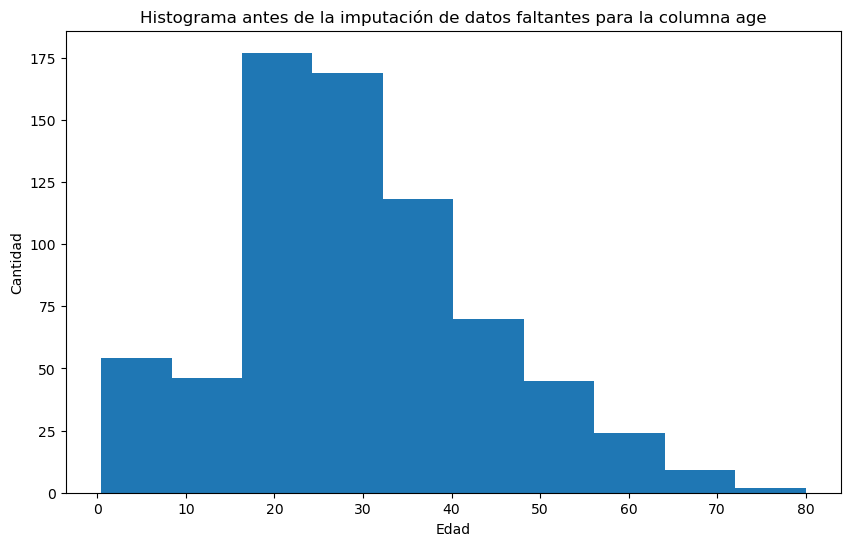

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(data["age"])
plt.title("Histograma antes de la imputación de datos faltantes para la columna age")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()

In [29]:
data["age"] = data["age"].fillna(data["age"].median())

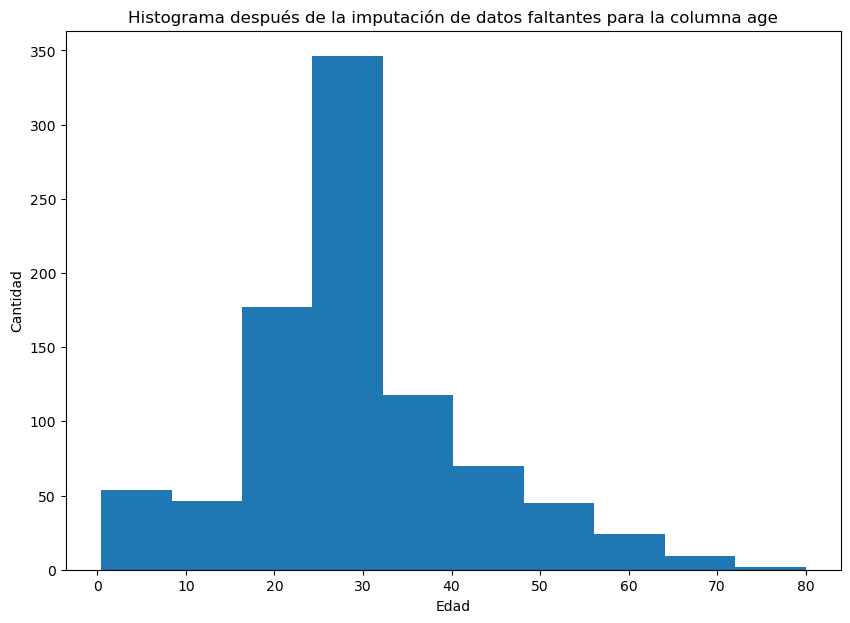

In [30]:
plt.figure(figsize=(10,7))
plt.hist(data["age"])
plt.title("Histograma después de la imputación de datos faltantes para la columna age")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()

__Eliminar columnas redundantes__

In [31]:
survivance = {'no':0, 'yes': 1}
pass_class = {'Third': 3, 'First': 1, 'Second': 2}

In [32]:
sur = data["alive"].map(survivance)
p_class = data["class"].map(pass_class)

In [38]:
print(data['survived'].equals(sur))
print(data['pclass'].equals(p_class))

True
True


In [35]:
data.drop(columns=["alive", "class"], inplace=True)

In [36]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Visualización del set de datos final.

In [37]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True


## Preguntas

### ¿Cuáles son los porcentajes de supervivencia y fallecimiento de niños, mujeres y hombres?

In [ ]:
data["who"].unique()

array(['man', 'woman', 'child'], dtype=object)

In [ ]:
ninos = data[data["who"] == "child"]["survived"].mean() * 100
mujeres = data[data["who"] == "woman"]["survived"].mean() * 100
hombres = data[data["who"] == "man"]["survived"].mean() * 100

print(f"Porcentaje de niños sobrevivientes: {ninos:.2f}%")
print(f"Porcentaje de mujeres sobrevivientes: {mujeres:.2f}%")
print(f"Porcentaje de hombres sobrevivientes: {hombres:.2f}%")

Porcentaje de niños sobrevivientes: 59.04%
Porcentaje de mujeres sobrevivientes: 75.65%
Porcentaje de hombres sobrevivientes: 16.39%


### Comparen en un gráfico el promedio de edad de los fallecidos contra los sobrevivientes, para cada uno de los puertos de embarque diferentes.

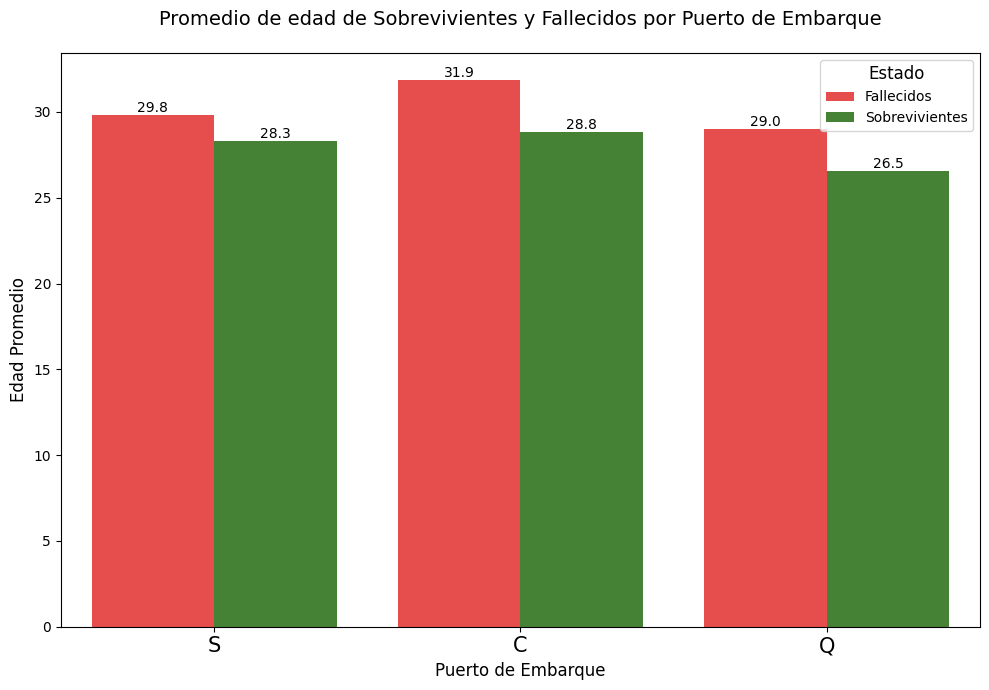

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x='embarked', 
                 y='age', 
                 hue='survived', 
                 data=data, 
                 estimator='mean',
                 palette={0: '#ff3535', 1: '#3f8f29'},  # Rojo para fallecidos, verde para sobrevivientes
                 errorbar=None)

plt.title('Promedio de edad de Sobrevivientes y Fallecidos por Puerto de Embarque', 
          fontsize=14, pad=20)
plt.xlabel('Puerto de Embarque', fontsize=12)
plt.ylabel('Edad Promedio', fontsize=12)
plt.xticks(fontsize=15)

handles, labels = ax.get_legend_handles_labels()
new_labels = ['Fallecidos', 'Sobrevivientes']
plt.legend(handles, new_labels, title='Estado', title_fontsize=12, fontsize=10)

for p in ax.patches:
    if p.get_height() != 0.0:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    fontsize=10)

plt.tight_layout()
plt.show()

### ¿Si viajabas con compañía tenías más probabilidad de sobrevivir? 

In [ ]:
solo = data[data["alone"] == True]["survived"].mean() * 100
acomp = data[data["alone"] == False]["survived"].mean() * 100

In [ ]:
print(f"Probabilidad de sobrevivir viajando solo: {solo:.2f}%")
print(f"Probabilidad de sobrevivir viajando acompañado: {acomp:.2f}%")

Probabilidad de sobrevivir viajando solo: 30.35%
Probabilidad de sobrevivir viajando acompañado: 50.56%


__La respuesta es NO__

### ¿Cuál es el puerto de embarque con mayor capacidad económica (considerando únicamentelos datos de este dataset)?

In [ ]:
data.groupby("embarked")["fare"].mean().sort_values()

embarked
Q    13.276030
S    27.243651
C    59.954144
Name: fare, dtype: float64

__Cherbourg__

__El puerto de Southampton__

### ¿A quienes embarcaron en Southampton les combino pagar tarifas más altas?

In [ ]:
data[data["embarked"] == 'S'].groupby('survived')['fare'].mean()

survived
0    20.743987
1    39.916514
Name: fare, dtype: float64

__Podría decirse que sí, la tarifa promedio de los que sobrevivieron fue más alta que la de los que no.__

### ¿Cuál es el puerto de embarque con mayor porcentaje de fallecimientos?

In [ ]:
(100 - (data.groupby("embarked")["survived"].mean() * 100)).sort_values()

embarked
C    44.642857
Q    61.038961
S    66.099071
Name: survived, dtype: float64

__El puerto de Southampton__

### ¿La edad influyó para NO sobrevivir?

In [50]:
data['age_bin'] = pd.cut(data['age'], bins=[0, 12, 18, 30, 50, 80], 
                       labels=['Niño', 'Adolescente', 'Joven Adulto', 'Adulto', 'Mayor'])
surv_rate = data.groupby('age_bin', observed=False)['survived'].mean()
print(surv_rate)

age_bin
Niño            0.579710
Adolescente     0.428571
Joven Adulto    0.331096
Adulto          0.423237
Mayor           0.343750
Name: survived, dtype: float64


Con una prueba t de student se comprueba si la edad influyó significativamente para NO sobrevivir.

In [51]:
sobrevivientes = data[data["survived"] == 1]["age"]
no_sobrevivientes = data[data["survived"] == 0]["age"]

t_stat, p_value = ttest_ind(sobrevivientes, no_sobrevivientes)
print(f"Valor p: {p_value:.4f}") 

Valor p: 0.0528


__En teoría la edad influyó, pero la evidencia no es estadísticamente significativa; es probable que esto sea debido al tratamiento de los datos.__

### Encontrar el patrón de supervivencia de la catástrofe

In [52]:
survival_rates = data.groupby(["pclass", 
                      "sex", 
                      "embarked", 
                      "who", 
                      "adult_male", 
                      "alone"], observed=False)["survived"].mean().to_dict()

In [53]:
age_bin_rates = data.groupby('age_bin')['survived'].mean().to_dict()

/tmp/ipykernel_88522/2742120367.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_rates = data.groupby('age_bin')['survived'].mean().to_dict()


In [55]:
def predict_survival_heuristic(row: pd.Series, group_rates: dict, age_rates: dict) -> int:
    """
    Predicts survival based on a weighted heuristic model.
    
    Logic:
    - 70% weight: Demographic Group Rate (Class + Sex + Port, etc.)
    - 30% weight: Age Group Rate
    
    Args:
        row (pd.Series): Passenger data row.
        group_rates (dict): Dictionary mapping demographic tuples to survival rates.
        age_rates (dict): Dictionary mapping age bins to survival rates.
        
    Returns:
        int: 1 (Survived) if weighted probability >= 0.5, else 0 (Died).
    """
    # 1. Construct the key for the group lookup
    key = tuple(row[col] for col in ['pclass', 'sex', 'embarked', 'who', 'adult_male', 'alone'])
    
    # 2. Get rates (defaulting to global mean ~0.38 if group not found to avoid errors)
    base_prob = group_rates.get(key, 0.38)
    age_prob = age_rates.get(row['age_bin'], 0.38)
    
    # 3. Apply Heuristic Formula
    final_prob = (0.7 * base_prob) + (0.3 * age_prob)
    
    return 1 if final_prob >= 0.5 else 0

In [ ]:
def Survivor(pclass, sex, embarked, who, adult_male, alone, age_bin):
    
    key = (pclass, sex, embarked, who, adult_male, alone)

    if key in survival_rates:
        combo_rate = survival_rates[key]
    else:
        combo_rate = data['survived'].mean()  
    
    age_rate = age_bin_rates.get(age_bin, data['survived'].mean())
    
    final_rate = 0.7 * combo_rate + 0.3 * age_rate
    
    if final_rate >= 0.5:
        return 1
    else:
        return 0

In [56]:
data['y_pred'] = data.apply(lambda row: predict_survival_heuristic(row, survival_rates, age_bin_rates), axis=1)

In [57]:
accuracy = accuracy_score(data['survived'], data['y_pred'])
print(f'Accuracy: {accuracy*100:.4f}%')

Accuracy: 82.8283%
